-65.0 0.316 0.0 0.607
-64.58194910835712 0.31960215733630076 0.040746294414550965 0.6011185920252352
-64.14889100110457 0.32315358719587356 0.07940958459261617 0.5953019551012446
-63.65304053040163 0.32665385185572376 0.11609305513434255 0.5895499020467045
-63.01427619519927 0.3300992649658885 0.15085483510384926 0.5838632149226345
-62.134170086358644 0.3334807833633593 0.18368996819770694 0.57824445783621
-60.90843225675604 0.3367829202043913 0.21452809728314565 0.5726987961760831
-59.23890487008803 0.3399835460874486 0.24324191655491706 0.5672350857179037
-57.04530676859468 0.3430545318306317 0.26966314254343576 0.5618676076754741
-54.275972790295924 0.3459632101031959 0.29360341505877796 0.55661895962142
-50.91612976138833 0.3486745963011586 0.3148775831560842 0.5515247178187702
-46.99205143579631 0.35115422866737106 0.3333266054306677 0.5466402926222833
-42.569886543524696 0.35337138671147883 0.3488369474445429 0.5420491043172854
-37.749004468830236 0.3553023447153062 0.36135289843

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

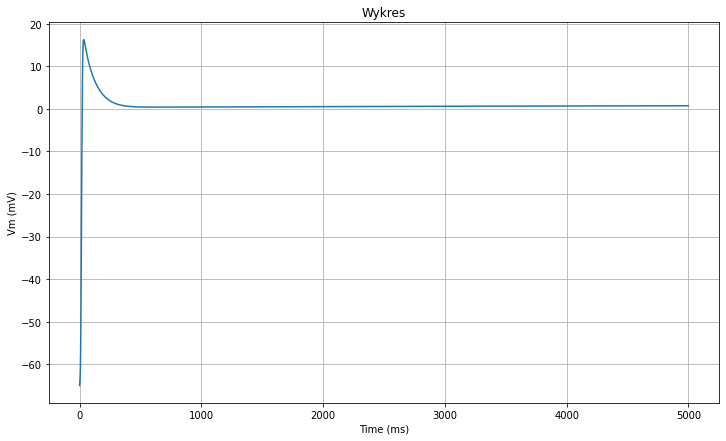

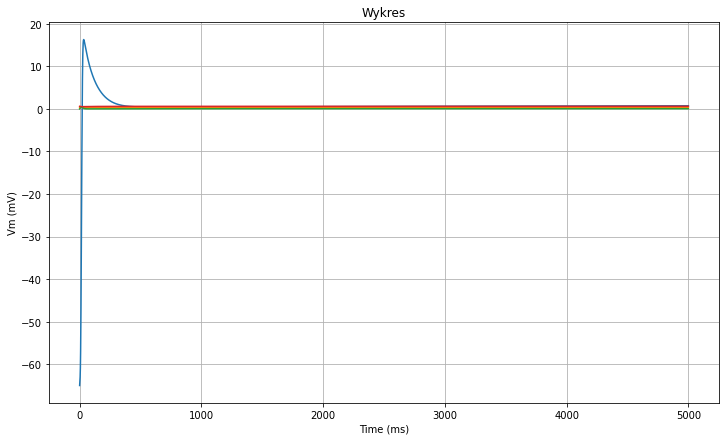

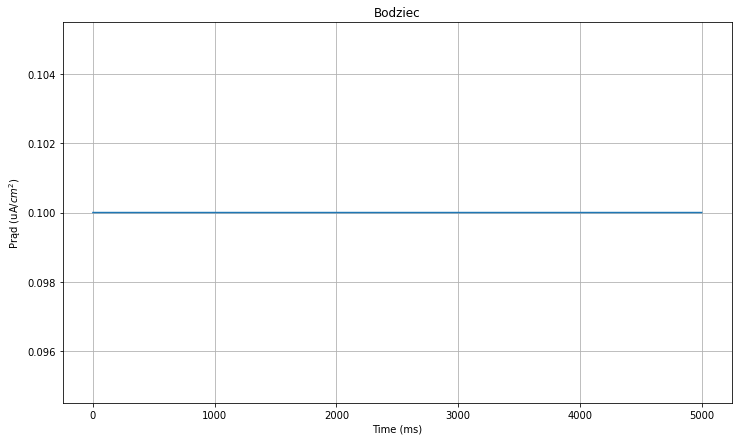

In [55]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy as sp
from google.colab import files
import pandas as pd
from tabulate import tabulate

class HH(object):
  def __init__(self,Vk=-12,Vna=120,Vl=10.6,gK=36,gNa=120, gL=0.3, Cm=1, m0=0, n0=0.316, h0=0.607, time=5000):
    self.Vk=Vk
    self.Vna=Vna
    self.Vl =Vl
    self.gK=gK
    self.gNa= gNa
    self.gL= gL
    self.Cm=Cm
    self.m0=m0
    self.n0=n0
    self.h0=h0
    self.time=time


  def alfa_m(self, V):
    return (0.1*(V+25))/(np.exp((V+25)/10)-1)
  
  def beta_m(self, V):
    return 4*np.exp(V/18)

  def alfa_n(self, V):
    return (0.01*(V+10))/(np.exp((V+10)/10)-1)

  def beta_n(self, V):
    return 0.125*np.exp(V/80)

  def alfa_h(self, V):
    return 0.07*np.exp(V/20)
  
  def beta_h(self, V):
    return 1/(np.exp((V+30)/10)+1)

  def I_init(self, t):
    return 0.1

  def main(self):
    I=0.1
    tau = 0.01
    V=np.zeros(self.time)
    m=np.zeros(self.time)
    n=np.zeros(self.time)
    h=np.zeros(self.time)

    V[0]=-65
    m[0]=self.m0
    n[0]=self.n0
    h[0]=self.h0

    for i in range(self.time-1):
      V[i+1]=V[i]+tau*((self.I_init(i)-self.gK*(n[i]**4)*(V[i]-self.Vk)-self.gNa*(m[i]**3)*h[i]*(V[i]-self.Vna)-self.gL*(V[i]-self.Vl))*(1/self.Cm))
      n[i+1]=n[i]+tau*(self.alfa_n(V[i])*(1-n[i])-self.beta_n(V[i])*n[i])
      m[i+1]=m[i]+tau*(self.alfa_m(V[i])*(1-m[i])-self.beta_m(V[i])*m[i])
      h[i+1]=h[i]+tau*(self.alfa_h(V[i])*(1-h[i])-self.beta_h(V[i])*h[i])
      print(V[i],n[i],m[i],h[i])
    return V, n, m, h
    
    
  def show(self, X, nazwa):
    fig, ax = plt.subplots(figsize=(12, 7))
    ax.plot(X)
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Vm (mV)')
    ax.set_title('Wykres')
    plt.grid()
    plt.savefig(nazwa+'.png')
    files.download(nazwa+".png")

  def show_all(self, X, nazwa):
    fig, ax = plt.subplots(figsize=(12, 7))
    X= np.array(X)
    ax.plot(X.transpose())
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Vm (mV)')
    ax.set_title('Wykres')
    plt.grid()
    plt.savefig(nazwa+'.png')
    files.download(nazwa+".png")


  def show_I(self,nazwa):
    Idv = [self.I_init(t) for t in range(self.time)]

    fig, ax = plt.subplots(figsize=(12, 7))
    ax.plot(Idv)
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel(r'Prąd (uA/$cm^2$)')
    ax.set_title('Bodziec')
    plt.grid()
    plt.savefig(nazwa+'.png')
    files.download(nazwa+".png") 

  

hodkin= HH()
V = hodkin.main()
V=np.array(V)
print 
hodkin.show(V[0], "wykres V")
hodkin.show_all(V,"wykresik")
hodkin.show_I("pradWykres")